In [1]:
!pip install hanziconv

  Stored in directory: C:\Users\may\AppData\Local\pip\Cache\wheels\03\d8\3c\c39898fa9c9ce6e34b0ab4c6604892462d440c743715c94054
Successfully built hanziconv


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
!python -m pip install --upgrade pip

  Found existing installation: pip 19.1
    Uninstalling pip-19.1:
      Successfully uninstalled pip-19.1


In [1]:
!pip install gensim -i https://pypi.douban.com/simple/

Looking in indexes: https://pypi.douban.com/simple/
  Created wheel for gensim: filename=gensim-3.8.0-cp36-cp36m-win_amd64.whl size=23708621 sha256=dec13bb170c30389612f0a470b1fdf0bc35b75f11b2e080d50d4a90516346ada
  Stored in directory: C:\Users\may\AppData\Local\pip\Cache\wheels\11\95\39\5571acc15e59ce5b9c2295e53c5208d230be079d1933d2755b
  Created wheel for smart-open: filename=smart_open-1.8.4-cp36-none-any.whl size=67375 sha256=dac35a7d4cf6e850e97a96edb2df66abdc414c4d25715789ac1106ec8929e998
  Stored in directory: C:\Users\may\AppData\Local\pip\Cache\wheels\d6\99\34\8ef455ebe1eac3de61bcf4793a3c1ef68431ca3ebeec804488
Successfully built gensim smart-open


In [1]:
from gensim.corpora import WikiCorpus
import jieba
from hanziconv import HanziConv
import re 

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [50]:
ptn1 = '<.+?>'
#ptn2 = "[“”，。「」（）《》、\'·\"\-]"
ptn2 = "[. 、，，。（）“”「」《》\'｛｝……:；【】\"\－\- ：( ) • 〈〉]"

outfile = open('C:/MAY_AI/TrainingCourse/NLP_Course/2019-07-27/homework/new.txt', 'w',encoding='utf-8')
with open('C:/MAY_AI/TrainingCourse/NLP_Course/2019-07-27/homework/AA/wiki_00', encoding='utf-8') as f:
    lines = f.readlines()
    
    for line in lines:
        line = re.sub(ptn1, '', line)
        line = re.sub(ptn2, '', line)
        line = HanziConv.toSimplified(line)
        outfile.write(line)
    print("Done!")
outfile.close()

Done!


In [2]:
with open('C:/MAY_AI/TrainingCourse/NLP_Course/2019-07-27/homework/new.txt',encoding='utf-8') as f:
    lines = f.readlines()
    print(lines[:5])         

['\n', '数学\n', '\n', '数学是利用符号语言研究数量结构变化以及空间等概念的一门学科从某种角度看属于形式科学的一种数学透过抽象化和逻辑推理的使用由计数计算量度和对物体形状及运动的观察而产生数学家们拓展这些概念为了公式化新的猜想以及从选定的公理及定义中建立起严谨推导出的定理\n', '\n']


In [3]:
token1= []
token2= []
token3= []
with open('C:/MAY_AI/TrainingCourse/NLP_Course/2019-07-27/homework/new.txt',encoding='utf-8') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        token1.append(list(jieba.cut(lines[i])))
    for i in token1:
        token2.append([word for word in i if word != "\n"])
    token3 = [i for i in token2 if i]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\may\AppData\Local\Temp\jieba.cache
Loading model cost 0.844 seconds.
Prefix dict has been built succesfully.


In [4]:
token3[:2]

[['数学'],
 ['数学',
  '是',
  '利用',
  '符号语言',
  '研究',
  '数量',
  '结构',
  '变化',
  '以及',
  '空间',
  '等',
  '概念',
  '的',
  '一门',
  '学科',
  '从',
  '某种',
  '角度看',
  '属于',
  '形式',
  '科学',
  '的',
  '一种',
  '数学',
  '透过',
  '抽象化',
  '和',
  '逻辑推理',
  '的',
  '使用',
  '由',
  '计数',
  '计算',
  '量度',
  '和',
  '对',
  '物体',
  '形状',
  '及',
  '运动',
  '的',
  '观察',
  '而',
  '产生',
  '数学家',
  '们',
  '拓展',
  '这些',
  '概念',
  '为了',
  '公式化',
  '新',
  '的',
  '猜想',
  '以及',
  '从',
  '选定',
  '的',
  '公理',
  '及',
  '定义',
  '中',
  '建立',
  '起',
  '严谨',
  '推导',
  '出',
  '的',
  '定理']]

In [13]:
from gensim.models.word2vec import Word2Vec 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
model = Word2Vec(token3, size=100, window=20, min_count=10, workers=8)

In [25]:
model.wv['数学']

array([ 0.15854916,  0.12610783, -0.10812315,  0.2897794 , -0.1761249 ,
       -0.06805105, -0.1988102 , -0.13839208, -0.35885656,  0.21571232,
       -0.11150695, -0.1561406 , -0.48937705, -1.6256471 ,  0.80298704,
        0.64408994, -0.04668787,  0.1696319 , -1.4147166 , -0.32153127,
        0.5607179 , -0.6778726 , -0.88236725,  0.53587925,  0.0496237 ,
        0.651204  , -0.36174682,  0.15676416, -0.22890359,  0.04588675,
        0.08070106, -0.18010569,  0.13704771, -0.2686037 ,  0.05034626,
        0.10393987,  0.04193183, -0.14212835, -0.02124233,  0.04385087,
       -0.36654025, -0.02082466,  0.33377182,  0.06441008,  0.30042475,
        0.05360147, -0.05592028, -0.469235  , -0.23127566, -0.20330045,
       -0.23814029,  0.22964302,  0.01212181, -0.27093428, -0.36187592,
       -0.06824566, -0.10678571, -0.02753873, -0.75989944, -0.47642797,
        0.36896515,  0.1973793 ,  0.16755387, -0.06416996,  0.06929551,
       -0.09073523, -0.0490258 , -0.02575544, -0.40483558, -0.40

In [26]:
def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


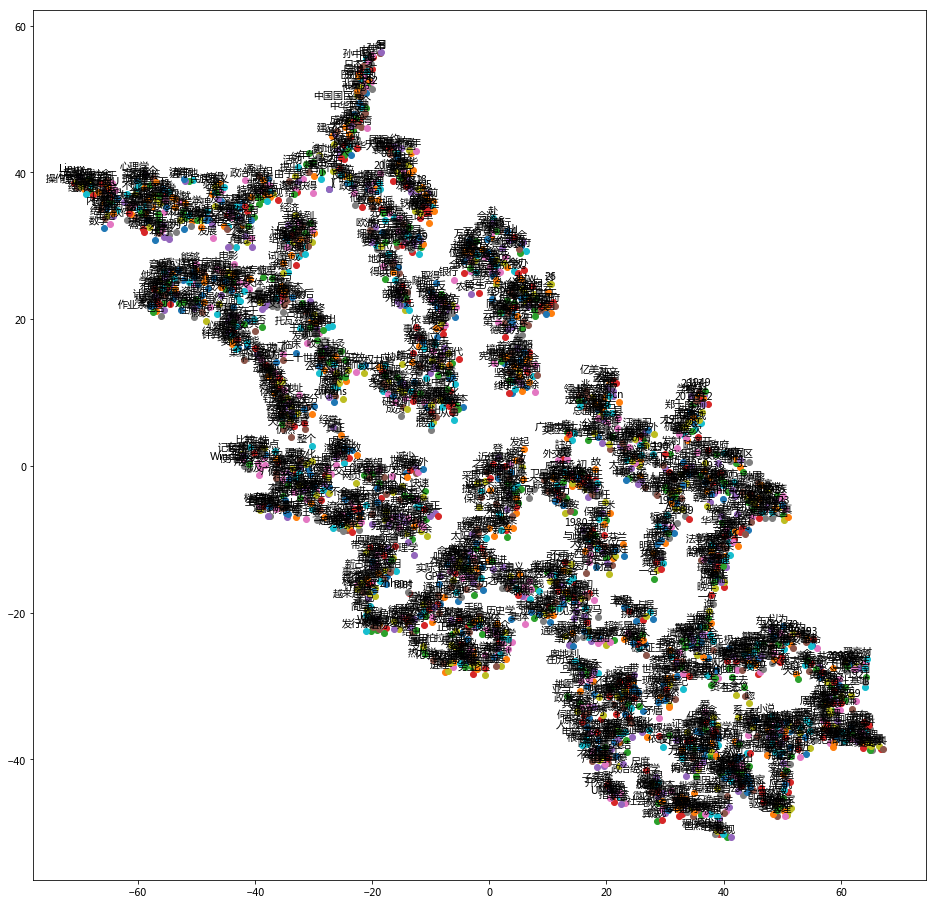

In [27]:
tsne_plot(model)

In [22]:
model1 = Word2Vec(token3, size=100, window=20, min_count=100, workers=8)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


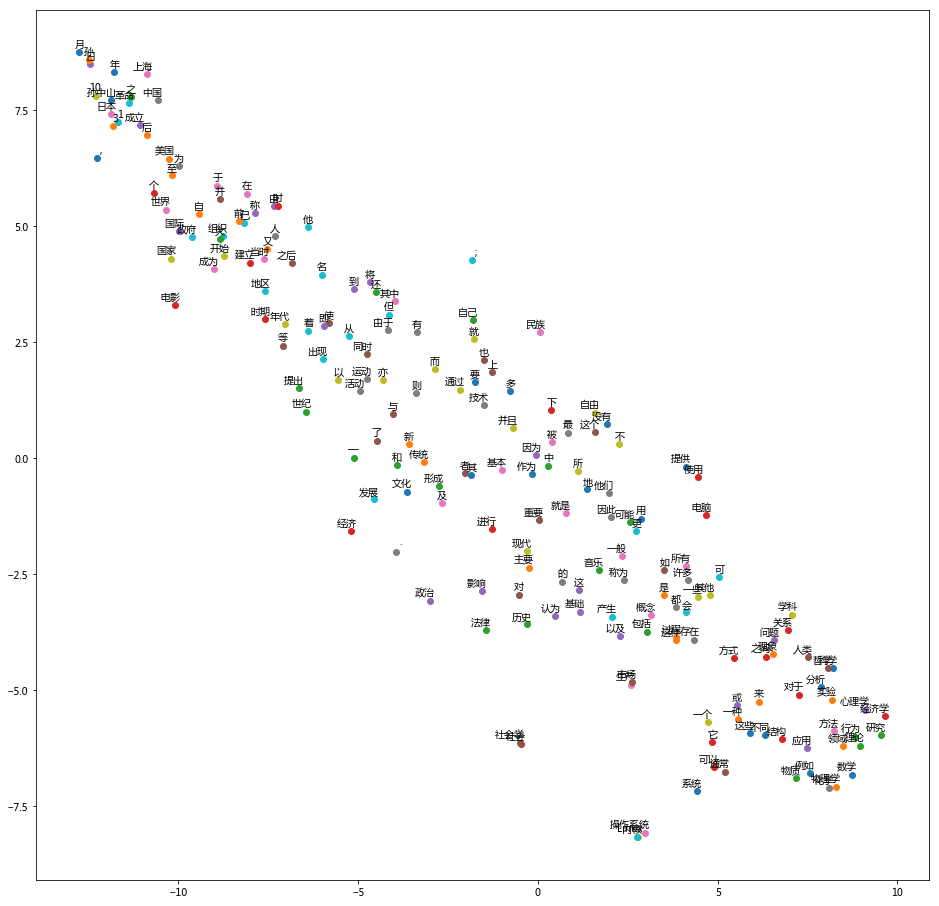

In [23]:
tsne_plot(model1)